<a href="https://colab.research.google.com/github/12sandra/Data-Science-Projects/blob/main/model_fake_job_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import re
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib
# Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve

# Sklearn Core
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("/content/fake_job_postings.csv", engine='python', on_bad_lines='warn')

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Create a new dataframe with only the fraudulent postings
fraud_data = data[data['fraudulent'] == 1]

# View the first few rows
fraud_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [5]:
data.shape

(17880, 18)

In [6]:
data.size

321840

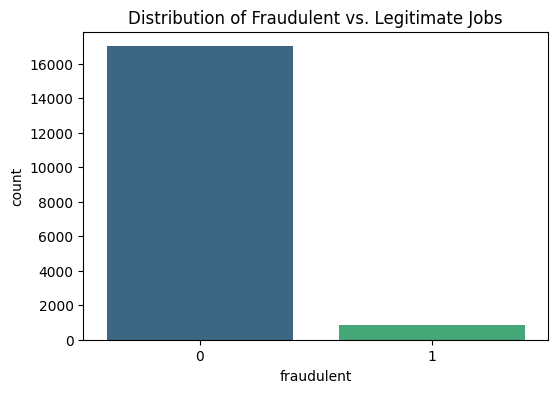

In [11]:

plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=data, palette='viridis')
plt.title('Distribution of Fraudulent vs. Legitimate Jobs')
plt.show()

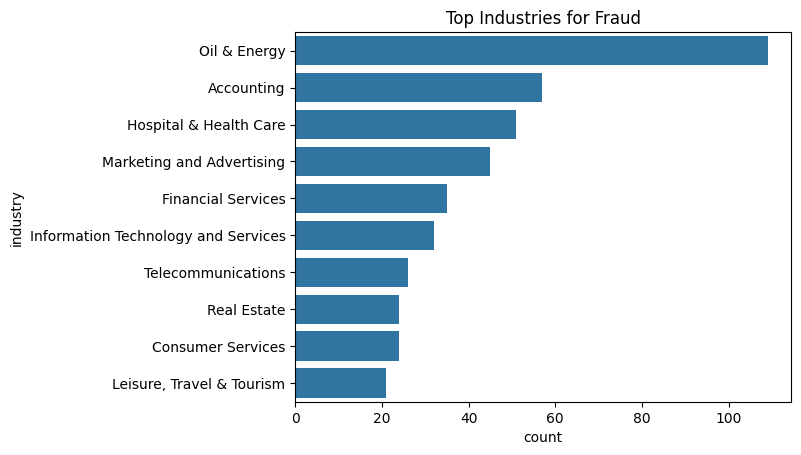

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Get only fraud data
fraud_data = data[data['fraudulent'] == 1]

# Plot top 10 Industries
sns.countplot(y='industry', data=fraud_data,
              order=fraud_data['industry'].value_counts().iloc[:10].index)
plt.title('Top Industries for Fraud')
plt.show()

In [8]:
num_df = data.select_dtypes(include=['int64', 'float64'])

print(num_df.columns)

Index(['job_id', 'telecommuting', 'has_company_logo', 'has_questions',
       'fraudulent'],
      dtype='object')


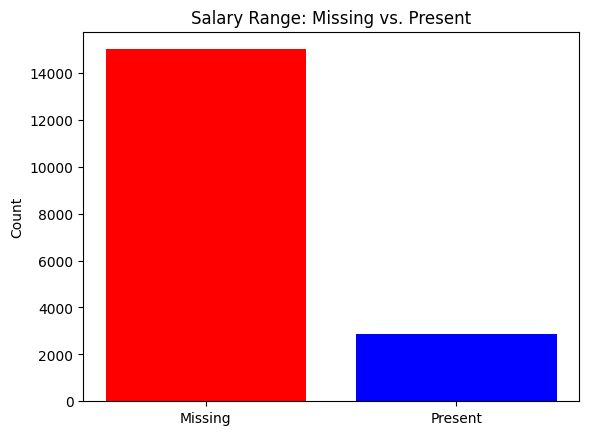

In [14]:
# Count missing vs. present values
missing = data['salary_range'].isna().sum()
present = data['salary_range'].notna().sum()

#  Plot as a simple bar chart
plt.bar(['Missing', 'Present'], [missing, present], color=['red', 'blue'])
plt.title('Salary Range: Missing vs. Present')
plt.ylabel('Count')
plt.show()

In [9]:
corr_matrix = num_df.corr()

print(corr_matrix)

                    job_id  telecommuting  has_company_logo  has_questions  \
job_id            1.000000      -0.004559         -0.014539      -0.087025   
telecommuting    -0.004559       1.000000         -0.019836       0.020345   
has_company_logo -0.014539      -0.019836          1.000000       0.233932   
has_questions    -0.087025       0.020345          0.233932       1.000000   
fraudulent        0.079872       0.034523         -0.261971      -0.091627   

                  fraudulent  
job_id              0.079872  
telecommuting       0.034523  
has_company_logo   -0.261971  
has_questions      -0.091627  
fraudulent          1.000000  


In [10]:
target_corr = corr_matrix['fraudulent'].sort_values(ascending=False)

print(target_corr)

fraudulent          1.000000
job_id              0.079872
telecommuting       0.034523
has_questions      -0.091627
has_company_logo   -0.261971
Name: fraudulent, dtype: float64


In [16]:
cols_to_drop = ['department', 'salary_range','job_id','telecommuting','has_company_logo','has_questions']
data.drop(columns=cols_to_drop, inplace=True)

In [17]:
data.duplicated().sum()

np.int64(302)

In [18]:
data = data.drop_duplicates()

In [7]:
data.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [19]:
#filling  with  empty string("")
text_cols = ["title","description","company_profile","requirements","benefits"]
data[text_cols] = data[text_cols].fillna("")


In [20]:
#filling with category "unknown"
cat_cols = ["employment_type",
            "required_experience","required_education",
            "industry","function","location"]

data[cat_cols] = data[cat_cols].fillna("Unknown")

In [21]:
data["combined_text"] = (
    data["title"] + " " +
    data["company_profile"] + " " +
    data["description"] + " " +
    data["requirements"] + " " +
    data["benefits"]
)

In [22]:
data.drop(columns=[
    "title","company_profile","description",
    "requirements","benefits"
], inplace=True)

In [23]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text

data["combined_text"] = data["combined_text"].apply(clean_text)

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

negation_words = {
    "no", "not", "nor", "never", "none", "nothing",
    "neither", "nobody", "nowhere", "cannot", "without"
}

custom_stopwords = list(set(ENGLISH_STOP_WORDS) - negation_words)

In [25]:
# Define target variable
y = data["fraudulent"]
X = data.drop(columns=["fraudulent"])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [28]:
models = {
    "LinearSVM": LinearSVC(class_weight='balanced', max_iter=5000),
    "Logistic": LogisticRegression(class_weight='balanced', max_iter=5000),
    "RandomForest": RandomForestClassifier(n_estimators=200, n_jobs=-1),
    "NaiveBayes": MultinomialNB(),
    "XGBoost": XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=(y == 0).sum() / (y == 1).sum(),
        n_jobs=-1
    )
}

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the preprocessor again to ensure it exists in memory
preprocessor = ColumnTransformer(
    transformers=[
        (
            "text",
            TfidfVectorizer(
                max_features=10000,
                stop_words=custom_stopwords,
                ngram_range=(1, 2)
            ),
            "combined_text"  # This must match your column name
        ),
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            cat_cols  # Ensure cat_cols list is defined above
        )
    ]
)

In [31]:
from sklearn.metrics import f1_score, recall_score, precision_score

# 1. List to store results
comparison_list = []

# 2. Loop through each model in your dictionary
for name, model in models.items():

    # Create a unique pipeline for this specific model
    current_pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", model)
    ])

    # Fit only on the training data (Avoids Leakage)
    current_pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = current_pipeline.predict(X_test)

    # Collect metrics
    comparison_list.append({
        "Model": name,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# 3. Create and sort the DataFrame
results_df = pd.DataFrame(comparison_list).sort_values(by="F1-Score", ascending=False)

# 4. Display the result
print(results_df)

          Model  Precision    Recall  F1-Score
0     LinearSVM   0.859873  0.789474  0.823171
4       XGBoost   0.852349  0.742690  0.793750
1      Logistic   0.690821  0.836257  0.756614
2  RandomForest   0.979592  0.561404  0.713755
3    NaiveBayes   0.861538  0.327485  0.474576


In [32]:
import joblib

# Replace 'LinearSVM' with your winning model name from the results_df
best_model_name = "LinearSVM"

# Re-create and fit the winning pipeline one last time
final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", models[best_model_name])
])
final_pipeline.fit(X_train, y_train)

# Save to a file
joblib.dump(final_pipeline, "optimized_fraud_model.pkl")
print(f"Saved the {best_model_name} model successfully!")

Saved the LinearSVM model successfully!


In [35]:
best_model = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", models["LinearSVM"])
])

# You MUST fit it one last time on the training data
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=10000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words=['bill',
                                                                              'con',
                                                                              'ltd',
                                                                              'eight',
                                                                              're',
                                                                              'part',
                                                                              'although',
                                                                              'hereafter',
                                                                              'anyhow',
                                                                              'become',
                                                                              'enough',
                                                                              'whereby',
                                                                              'or',
                                                                              'seems',
                                                                              'noone',
                                                                              'him',
                                                                              'cant',
                                                                              'its',
                                                                              'cry',
                                                                              'go',
                                                                              'was',
                                                                              'anywhere',
                                                                              'amoungst',
                                                                              'however',
                                                                              'always',
                                                                              'own',
                                                                              'per',
                                                                              'whatever',
                                                                              'five',
                                                                              'you', ...]),
                                                  'combined_text'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'required_experience',
                                                   'required_education',
                                                   'industry', 'function',
                                                   'location'])])),
                ('clf', LinearSVC(class_weight='balanced', max_iter=5000))])

In [36]:
from sklearn.metrics import classification_report

# 1. Use your best_model to make predictions on the test set
y_pred = best_model.predict(X_test)

# 2. Print the report
# We specify target_names to make it easy to read (0 = Legit, 1 = Fraud)
print("--- Final Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Legit', 'Fraud']))

--- Final Classification Report ---
              precision    recall  f1-score   support

       Legit       0.99      0.99      0.99      3345
       Fraud       0.86      0.79      0.82       171

    accuracy                           0.98      3516
   macro avg       0.92      0.89      0.91      3516
weighted avg       0.98      0.98      0.98      3516



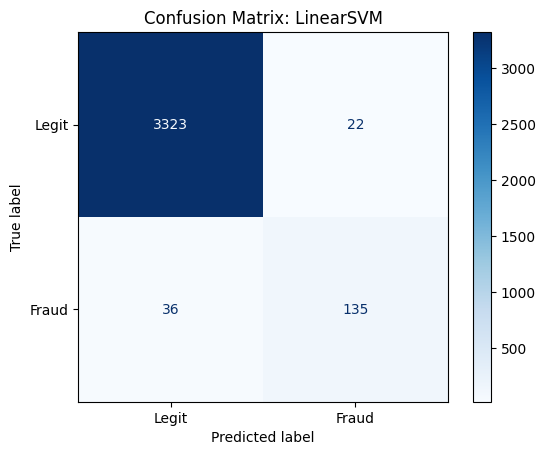

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Get predictions from the best model (LinearSVM)
# Assuming 'best_model' is the fitted LinearSVM pipeline
y_pred = best_model.predict(X_test)

# 2. Create the matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: LinearSVM")
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

# 1. Get decision scores
y_train_scores = best_model.decision_function(X_train)
y_test_scores = best_model.decision_function(X_test)

# 2. Calculate AUC scores
train_auc = roc_auc_score(y_train, y_train_scores)
test_auc = roc_auc_score(y_test, y_test_scores)

# 3. Calculate the Difference
diff = train_auc - test_auc

# 4. Print using simple commas
print("Train ROC-AUC:", train_auc)
print("Test ROC-AUC:", test_auc)
print("Difference:", diff)

Train ROC-AUC: 1.0
Test ROC-AUC: 0.9835033523020306
Difference: 0.016496647697969435


In [33]:
# Create a fake 'new' job posting
new_job = pd.DataFrame({
    "combined_text": ["Urgent hire! Earn 5000 dollars a week working from home. No experience needed. Click this link to pay for your laptop."],
    "employment_type": ["Full-time"],
    "required_experience": ["Unknown"],
    "required_education": ["Unknown"],
    "industry": ["Unknown"],
    "function": ["Unknown"],
    "location": ["Remote"]
})

# Use the pipeline to predict
prediction = final_pipeline.predict(new_job)
probability = final_pipeline.decision_function(new_job) # For SVM

print(f"Prediction (1=Fraud, 0=Legit): {prediction[0]}")

Prediction (1=Fraud, 0=Legit): 1
